In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
micedrug = pd.read_csv(mouse_drug_data_to_load)
trialdata = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset

data = pd.merge(trialdata,micedrug, on=('Mouse ID'))
# Display the data table for preview

data.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
# "as_index = false" keeps drug names out of index

Druggroup = data.groupby(['Drug','Timepoint'],as_index = False)
MTV = Druggroup["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
MTV_df = pd.DataFrame(MTV)
# Preview DataFrame
MTV_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Need drug name as grouped index to calculate standard error 

Druggroup = data.groupby(['Drug','Timepoint'])
STDERR = Druggroup["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
STDERR_df = pd.DataFrame(STDERR)

# Reset index to get drug name on every row
STDERR_df = STDERR_df.reset_index()

#Preview DataFrame
STDERR_df.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames

# Remake Mean Tumor Volume dataframe, this time grouping by timepoint first
Druggroup2 = data.groupby(['Timepoint','Drug'], as_index = False)
MTV2 = Druggroup2["Tumor Volume (mm3)"].mean()
MTV2_df = pd.DataFrame(MTV2)

# use pivot to set timepoint index, drug colums, and tumor volumes as the values
MTV2_pdf = MTV2_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
MTV2_pdf

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


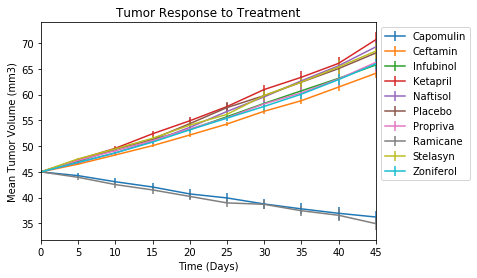

In [5]:
# Generate the Plot (with Error Bars)

#Pivot error table to line up with pivoted Mean Tumor Volume table
STDERR_pdf = STDERR_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

#get column list 
ylist = MTV2_df["Drug"].unique()

#Create plot, use pivoted error table as error values

fig1 = MTV2_pdf.plot(y=ylist,yerr=STDERR_pdf)

#formatting
fig1.legend(bbox_to_anchor=(1, 1), loc='upper left')
fig1.set_title("Tumor Response to Treatment")
fig1.set_xlabel("Time (Days)")
fig1.set_ylabel("Mean Tumor Volume (mm3)")

# Save the Figure
plt.savefig("Tumor Response to Treatment.png", bbox_inches='tight')




In [6]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
Druggroup3 = data.groupby(['Drug','Timepoint'])
MMS = Druggroup3["Metastatic Sites"].mean()

# Convert to DataFrame
MMS_df = pd.DataFrame(MMS)
# Preview DataFrame
MMS_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

Druggroup3 = data.groupby(['Drug','Timepoint'])
MMS_STDERR = Druggroup3["Metastatic Sites"].sem()

# Convert to DataFrame
MMS_STDERR_df = pd.DataFrame(MMS_STDERR)
# Preview DataFrame
MMS_STDERR_df.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
#reset index to get drug names on each row
# Remake Mean Tumor Volume dataframe, this time grouping by timepoint first
Druggroup3 = data.groupby(['Timepoint','Drug'], as_index = False)
MMS2 = Druggroup3["Metastatic Sites"].mean()
MMS2_df = pd.DataFrame(MMS2)

# use pivot to set timepoint index, drug colums, and tumor volumes as the values
MMS2_pdf = MMS2_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
MMS2_pdf

#pivot
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


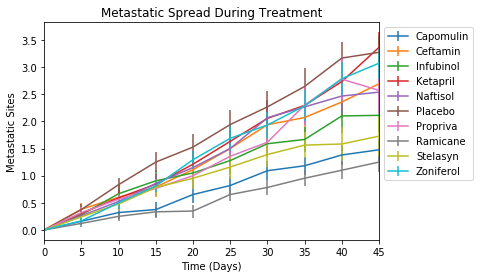

In [10]:
# Generate the Plot (with Error Bars)

#Reset index on standard error table to make timepoint axis available
MMS_STDERR_df = MMS_STDERR_df.reset_index()

#Pivot error table to line up with pivoted Mean Tumor Volume table
MMS_STDERR_pdf = MMS_STDERR_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

#get column list 
ylist = MMS2_df["Drug"].unique()

#Create plot, use pivoted error table as error values

fig2 = MMS2_pdf.plot(y=ylist,yerr=MMS_STDERR_pdf)

#formatting
fig2.legend(bbox_to_anchor=(1, 1), loc='upper left')
fig2.set_title("Metastatic Spread During Treatment")
fig2.set_xlabel("Time (Days)")
fig2.set_ylabel("Metastatic Sites")

# Save the Figure
plt.savefig("Metastatic Spread During Treatment.png", bbox_inches='tight')


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

#Group by Drug and timepoint
Druggroup4 = data.groupby(['Drug','Timepoint'],as_index = False)

#Store into a dataframe, rename column
SVR_df = Druggroup4["Mouse ID"].count()
SVR_df = SVR_df.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
SVR_df.head()



,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
SVR_pdf = SVR_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview the Data Frame
SVR_pdf

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


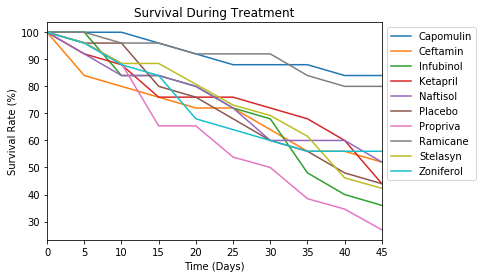

In [13]:
# Generate the Plot (Accounting for percentages)

ylist = SVR_df["Drug"].unique()

# Convert to percentage, no need to format percent signs.
# Because a some trials had 26 mice, built a list off of the max values off each column to divide with

initialmice = SVR_pdf.max(axis=0)

SVRPur_df = SVR_pdf.divide(initialmice) * 100

#Create plot

fig3 = SVRPur_df.plot(y=ylist)

#formatting
fig3.legend(bbox_to_anchor=(1, 1), loc='upper left')
fig3.set_title("Survival During Treatment")
fig3.set_xlabel("Time (Days)")
fig3.set_ylabel("Survival Rate (%)")

# Save the Figure
plt.savefig("Survival During Treatment.png", bbox_inches='tight')


# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [14]:
# Calculate the MTV change for each drug

final = MTV_df.loc[MTV_df["Timepoint"] == 45, ['Drug','Tumor Volume (mm3)']]
final = final.set_index("Drug")
delta = (final["Tumor Volume (mm3)"] - 45)/ 45 * 100

delta 


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Tumor Volume (mm3), dtype: float64

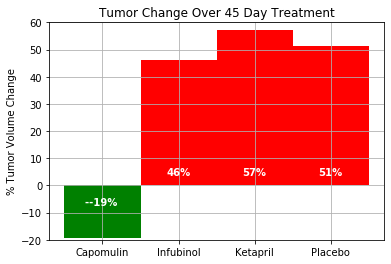

In [32]:
# Store all Relevant Percent Changes into a Tuple

fourdrugs = (delta["Capomulin"], delta["Infubinol"], delta["Ketapril"], delta["Placebo"])

# Splice the data between passing and failing drugs

fig4, ax = plt.subplots()
drugindex= np.arange(len(fourdrugs))  
width = 1

# Sets pass and fail by index number
dPass = ax.bar(drugindex[0], fourdrugs[0], width, color='green')
dFail = ax.bar(drugindex[1:], fourdrugs[1:], width, color='red')


# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(drugindex)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_ylim([-20,60])
ax.grid(True)

# Use functions to label the percentages of changes

def labelpercentFail(labels):
    for label in labels:
        height = label.get_height()
        ax.text(label.get_x() + label.get_width()/2, 3,'%d%%' % int(height),
                ha='center', va='bottom', color="white", fontweight='bold')

def labelpercentPass(labels):
    for label in labels:
        height = label.get_height()
        ax.text(label.get_x() + label.get_width()/2, -8,'-%d%% ' % int(height),ha='center', va='bottom', color="White", fontweight='bold')


# Call functions to implement the function calls

labelpercentPass(dPass)
labelpercentFail(dFail)

# Save the Figure
fig4.savefig("Tumor Change Over 45 Day Treatment.png")

# Show the Figure
fig4.show()

![Metastatic Spread During Treatment](../Images/change.png)